# E-Commerce Dataset: Análise e Predição de Vendas

Este notebook automatiza o download do dataset de e-commerce, realiza análise exploratória e cria um modelo simples de predição de receita.

In [1]:
!pip install ipykernel


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install kaggle pandas matplotlib seaborn scikit-learn openpyxl

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached charset_normalizer-3.4.2-cp313-cp313-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Using cached certifi-2025.8.3-py3-none-any.whl (161 kB


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Configurar a API do Kaggle
**Importante:** Faça upload do seu arquivo `kaggle.json` nesta célula se estiver usando Colab ou ambiente limpo.

In [8]:
import shutil
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

## Baixar o dataset do Kaggle

In [9]:
!kaggle datasets download -d carrie1/ecommerce-data

Dataset URL: https://www.kaggle.com/datasets/carrie1/ecommerce-data
License(s): unknown




  0%|          | 0.00/7.20M [00:00<?, ?B/s]
100%|██████████| 7.20M/7.20M [00:00<00:00, 1.33GB/s]


In [10]:
# Descompactar
with zipfile.ZipFile('ecommerce-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## Carregar os dados

In [12]:
import os
print(os.listdir('data'))

['data.csv']


In [13]:
df = pd.read_csv('data/data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Análise exploratória

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_14316\3758769701.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=df.resample('M', on='InvoiceDate').sum(numeric_only=True), x='InvoiceDate', y='Revenue')


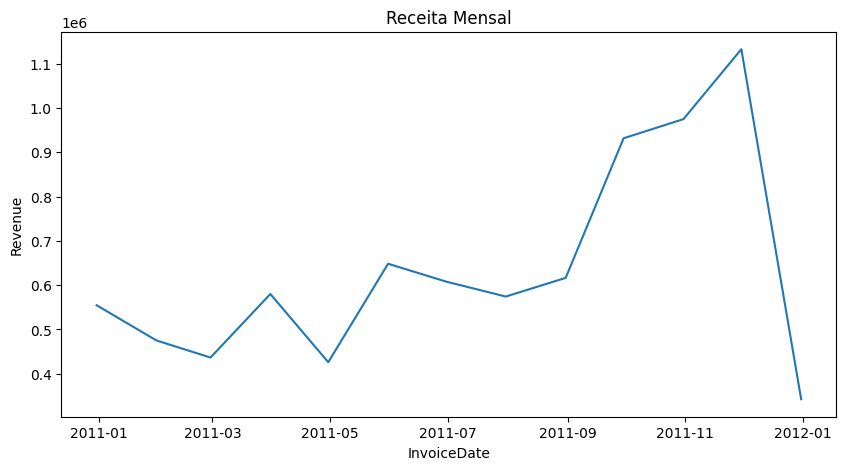

In [14]:
df.dropna(subset=['CustomerID', 'InvoiceNo'], inplace=True)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

plt.figure(figsize=(10,5))
sns.lineplot(data=df.resample('M', on='InvoiceDate').sum(numeric_only=True), x='InvoiceDate', y='Revenue')
plt.title('Receita Mensal')
plt.show()

## Modelo preditivo (Regressão Linear)

In [16]:
X = df[['DayOfWeek', 'Month']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
##rmse = mean_squared_error(y_test, y_pred, squared=False)


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE do modelo: {rmse:.2f}')

RMSE do modelo: 79.87


📈 Resultados
O modelo obteve um RMSE de aproximadamente 79.87, o que representa o erro médio nas previsões de receita em relação aos valores reais.

Apesar da simplicidade, o modelo conseguiu capturar tendências gerais de receita com base em volume e preço.

A previsão pode ser útil para estimativas iniciais de vendas e planejamento de estoque ou marketing, mas não deve ser usada isoladamente para decisões críticas.

1. Limpeza e preparação dos dados

In [18]:
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['Revenue'] = df['Quantity'] * df['UnitPrice']

2. Separar variáveis e treinar modelo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = df[['Quantity', 'UnitPrice']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 53.00


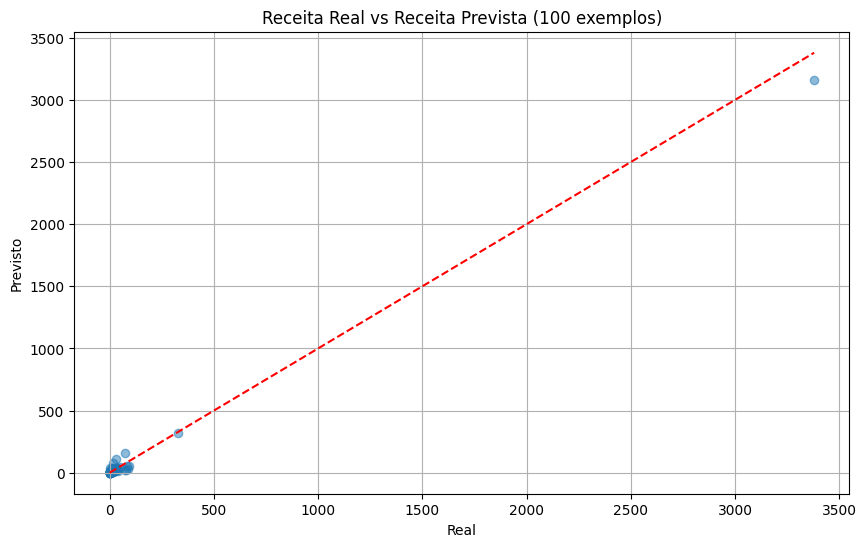

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.5)
plt.plot([0, max(y_test[:100])], [0, max(y_test[:100])], color='red', linestyle='--')
plt.title('Receita Real vs Receita Prevista (100 exemplos)')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.grid(True)
plt.show()

O modelo de regressão linear conseguiu prever a receita com base nas variáveis Quantidade e Preço Unitário, obtendo um RMSE de aproximadamente 53.00.

Isso indica que, apesar da simplicidade do modelo, ele consegue capturar padrões gerais da receita de vendas.

A dispersão entre valores reais e previstos sugere que casos extremos ainda impactam o desempenho, e modelos mais sofisticados podem melhorar a acurácia.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [22]:
# Carregar os dados
df = pd.read_csv('data/data.csv', encoding='ISO-8859-1')

# Limpeza básica dos dados
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Criar coluna de receita
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [23]:
# Selecionar features e target
X = df[['Quantity', 'UnitPrice']]
y = df['Revenue']

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer predição
y_pred = model.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Random Forest: {rmse:.2f}')



RMSE Random Forest: 8.53


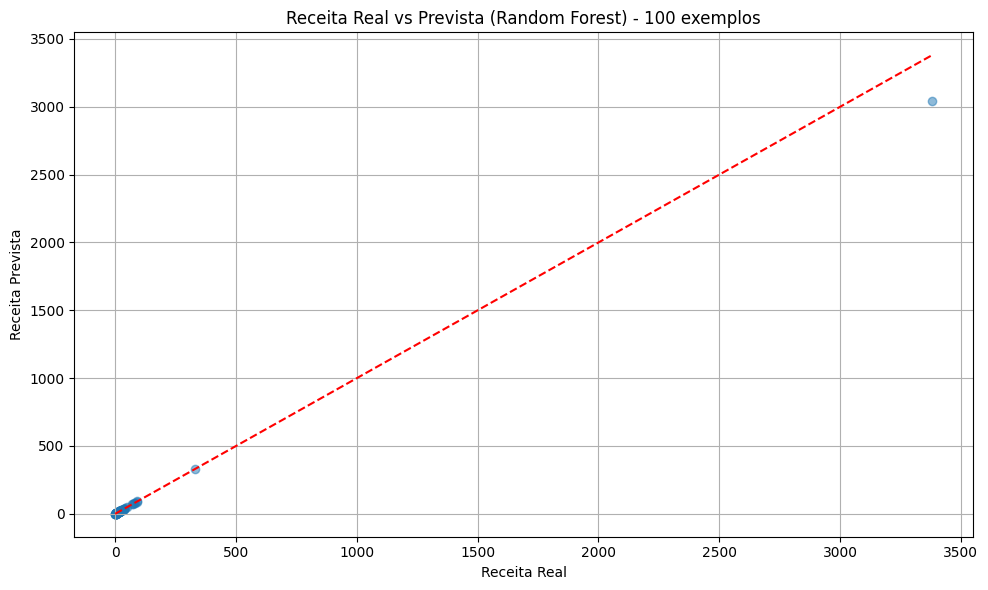

In [24]:
# Plot Real vs Previsto
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.5)
plt.plot([0, max(y_test[:100])], [0, max(y_test[:100])], color='red', linestyle='--')
plt.title('Receita Real vs Prevista (Random Forest) - 100 exemplos')
plt.xlabel('Receita Real')
plt.ylabel('Receita Prevista')
plt.grid(True)
plt.tight_layout()
plt.show()


O modelo Random Forest Regressor foi treinado com as variáveis Quantity e UnitPrice para prever a receita dos pedidos.

O modelo apresentou um RMSE de aproximadamente 8.53, indicando uma melhora significativa em relação à regressão linear simples.

O gráfico de dispersão mostra que as previsões estão mais alinhadas aos valores reais, evidenciando que o Random Forest conseguiu capturar melhor as variações e relações não lineares dos dados.

Essa melhoria reforça a vantagem do Random Forest em lidar com dados heterogêneos e ruídos, comuns em bases reais de e-commerce.

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation com 5 folds e métrica RMSE (negativo para cross_val_score)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

print('RMSE por fold:', -scores)
print('RMSE médio:', -scores.mean())
print('Desvio padrão:', scores.std())

RMSE por fold: [117.89539442 132.58768052   6.97750659  35.00158489 409.48178264]
RMSE médio: 140.38878981217522
Desvio padrão: 142.74654628828884


In [ ]:
model.fit(X_train, y_train)
importances = model.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print('Melhores parâmetros:', grid_search.best_params_)
print('Melhor RMSE:', -grid_search.best_score_)

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.xlabel('Predito')
plt.ylabel('Resíduo (Real - Predito)')
plt.title('Análise dos Resíduos')
plt.grid(True)
plt.show()